# Relatório Ep 1 
### MAC5742 - Programação Concorrente e Paralela
Integrantes
- Gabriel Miranda de Araujo - 10297689
- João Seckler - 4603521
- Liang Shen - 9833509
- Paulo Henrique da Silveira - 7580971

## Introdução

Você já ouviu falar do Conjunto de Mandelbrot1? Seu descobridor foi Benoit Mandelbrot, que trabalhava na IBM durante a década de 1960 e foi um dos primeiros a usar computação gráfica para mostrar como complexidade pode surgir a partir de regras simples. Benoit fez isso gerando e visualizando imagens de geometria fractal.
Um desses fractais foi nomeado Conjunto de Mandelbrot pelo matemático Adrien Douady. O Conjunto de Mandelbrot pode ser informalmente definido como o conjunto dos números complexos c para os quais a função $fc(z) = z2 + x$ não diverge quando é iterada começando em $z = 0$. Isto é, a sequência $fc(0)$, $fc(fc(0))$, $fc(fc(fc(0)))$, . . . é sempre limitada. A Figura 1 mostra uma região do Conjunto de Mandelbrot conhecida como Seahorse Valley.

<figure class="image">
  <img src="./doc/img/elephant.png" alt="Figura 1: Seahorse Valley">
  <figcaption>Figura 1: teste</figcaption>
</figure>

<!-- ![image info](./doc/img/elephant.png) -->

Esse EP consiste em analisar a geração do conjunto de mandelbrot de forma sequencial e paralelizada, utilizando as bibliotecas do Pthreads e OpenMP. O objetivo é estudar qual é o impacto do número de threads no tempo de execução e qual é o impacto das operações de I/O e alocação de memória no tempo de execução total do programa.

## Metodologia

Este trabalho foi dividido em duas partes: a paralelização do algoritmo e a avaliação do seu desempenho (tanto em sua versão sequencial quanto paralela). Junto ao enunciado foi fornecido o algoritmo sequencial para gerar o conjunto de Mandelbrot, em linguagem C. 

Para a paralelização, foram utilizados as APIs de Pthreads e de OpenMP, implementados respectivamente nos arquivos mandelbrot_pth.c e mandelbrot_omp.c. Ambas as APIs são amplamente conhecidas para o processo de paralelização, que consiste em, por exemplo, distribuir tarefas para serem executadas simultaneamente por vários núcleos de um processador.

A POSIX Threads, também conhecido como Pthreads, é um padrão de divisão de linhas/fios de tarefa (threads), criado para a família de linguagem C, que permite criar, manipular, sincronizar e terminar threads num programa. Essas funções se apresentam em formas de mais baixo nível, o que permite um controle mais fino sobre os threads ao longo do código.

Já OpenMP é uma API de mais alto nível, e portanto com mais portabilidade, e que não é limitado apenas à família da linguagem C. Estende-se, por exemplo, para a linguagem FORTRAN. OpenMP adota o paradigma de Fork-Join, o que significa que quando uma thread encontra uma instrução de paralelização, ele se torna a thread mestre, cria um grupo de threads (fork), e volta a executar quando o grupo termina de executar as tarefas atribuídas (join).
Por fim, as três versões do algoritmo foram avaliadas em uma máquina que possui o processador AMD Ryzen 5 3500X 6-Core e 8GB de memória RAM. A medição do desempenho dos códigos consistiu em anotações do tempo de execução do programa compilado para quatro diferentes regiões, com e sem tempo de I/O e alocação de memória, variando o número de threads, tamanho de entrada, repetindo 10 vezes e calculando ao final o tempo médio das repetições e seu desvio padrão. O resumo dos experimentos consta na tabela abaixo.


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0pky">Pthreads OpenMP Sequencial</th>
    <th class="tg-0pky"></th>
    <th class="tg-0pky"></th>
    <th class="tg-0pky"></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Regiões</td>
    <td class="tg-0pky">Triple Spiral, Elephant, Seahorse &amp; Full</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">I/O e Aloc. Mem.</td>
    <td class="tg-0pky">Sem</td>
    <td class="tg-0pky">Com e Sem</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">No de Threads</td>
    <td class="tg-0pky">2^2 ... 2^5</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Tamanho da Entrada</td>
    <td class="tg-0pky">2^4 ... 2^{13}</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">No de Execuções</td>
    <td class="tg-0pky">10</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
</tbody>
</table>

## Resultados e Análises

In [ ]:
using Pkg
Pkg.add("Plots")

In [ ]:
Pkg.add("PyPlot")
using Plots

In [ ]:
Pkg.add("CSV")
using CSV

In [ ]:
Pkg.add("DataFrames")
using DataFrames

### Sequencial

Na figura abaixo é apresentado os gráficos do tempo de execução para as quatro regiões do conjunto de mandelbrot dos tempos de alocação e I/O. O que se pode notar é

- o tempo de alocação de memória é proporcional ao tamanho da entrada como esperado;
- o crescimento do tempo de execução é também proporcional ao tamanho da entrada;
- Em relação às regiões, o “full” tem o menor tempo de execução, enquanto “triple spiral valley” tem a maior.



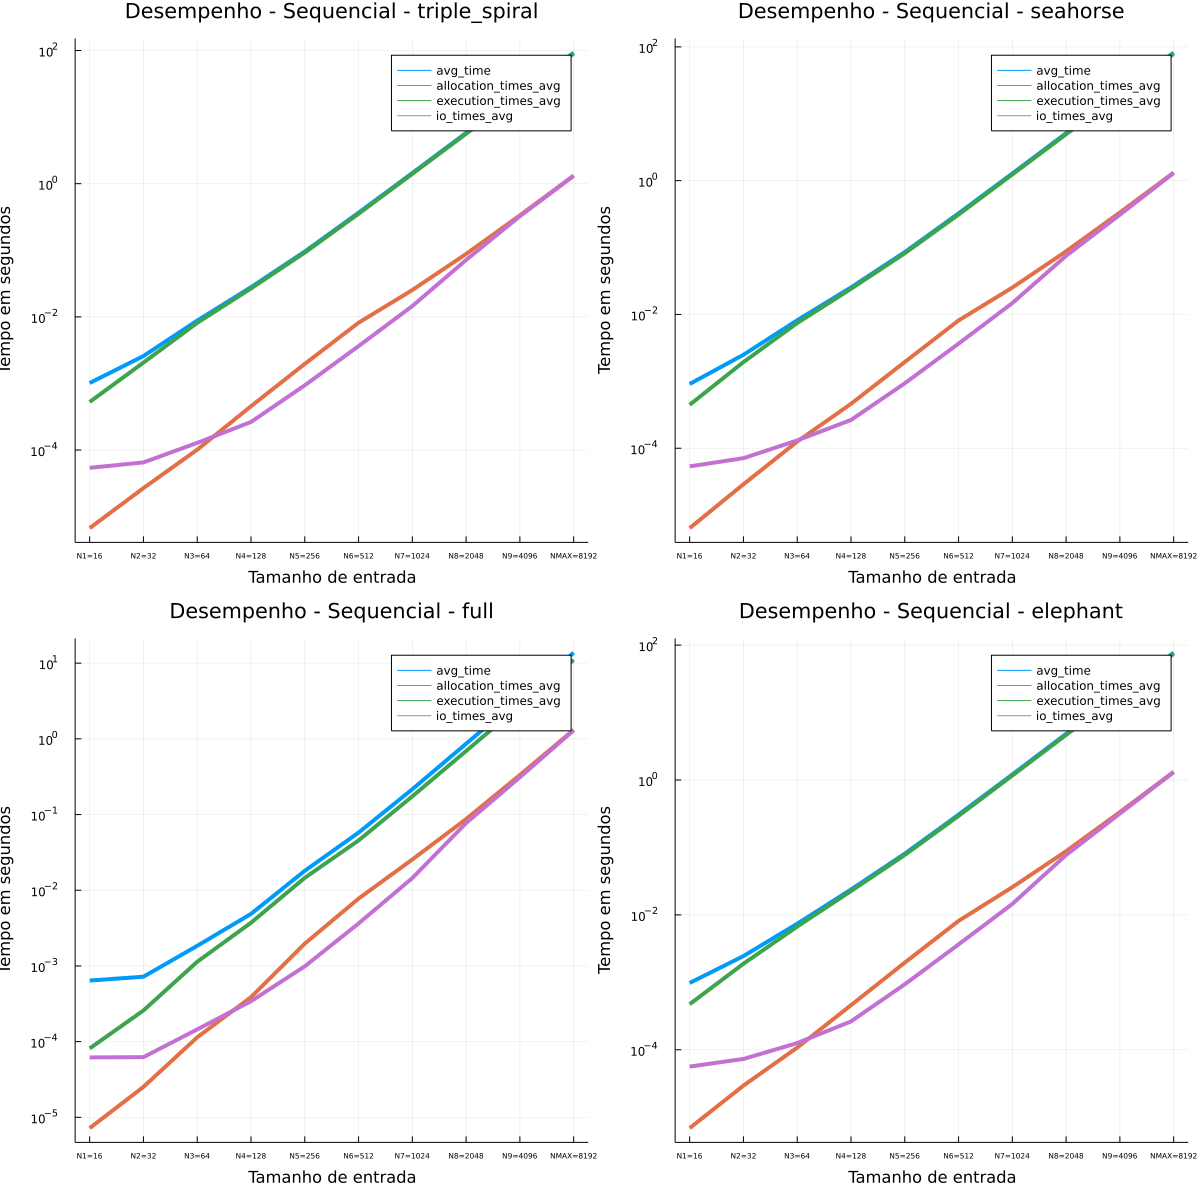

In [ ]:
ts = CSV.read("src/results/mandelbrot_seq/triple_spiral.csv", DataFrame)
sh = CSV.read("src/results/mandelbrot_seq/seahorse.csv", DataFrame)
full = CSV.read("src/results/mandelbrot_seq/full.csv", DataFrame)
elephant = CSV.read("src/results/mandelbrot_seq/elephant.csv", DataFrame)

##gambiarra para ordenar corretamente
tmp_ts = string.(ts.sizes)
for i = 1:length(tmp_ts)
    if tmp_ts[i] == "16"
        tmp_ts[i] = "N1=" * tmp_ts[i]
    elseif tmp_ts[i] == "32"
        tmp_ts[i] = "N2=" * tmp_ts[i]
    elseif tmp_ts[i] == "64"
        tmp_ts[i] = "N3=" * tmp_ts[i]
    elseif tmp_ts[i] == "128"
        tmp_ts[i] = "N4=" * tmp_ts[i]
    elseif tmp_ts[i] == "256"
        tmp_ts[i] = "N5=" * tmp_ts[i]
    elseif tmp_ts[i] == "512"
        tmp_ts[i] = "N6=" * tmp_ts[i]
    elseif tmp_ts[i] == "1024"
        tmp_ts[i] = "N7=" * tmp_ts[i]
    elseif tmp_ts[i] == "2048"
        tmp_ts[i] = "N8=" * tmp_ts[i]
    elseif tmp_ts[i] == "4096"
        tmp_ts[i] = "N9=" * tmp_ts[i]
    elseif tmp_ts[i] == "8192"
        tmp_ts[i] = "NMAX=" * tmp_ts[i]
    end
end

tmp_sh = string.(sh.sizes)
for i = 1:length(tmp_sh)
    if tmp_sh[i] == "16"
        tmp_sh[i] = "N1=" * tmp_sh[i]
    elseif tmp_sh[i] == "32"
        tmp_sh[i] = "N2=" * tmp_sh[i]
    elseif tmp_sh[i] == "64"
        tmp_sh[i] = "N3=" * tmp_sh[i]
    elseif tmp_sh[i] == "128"
        tmp_sh[i] = "N4=" * tmp_sh[i]
    elseif tmp_sh[i] == "256"
        tmp_sh[i] = "N5=" * tmp_sh[i]
    elseif tmp_sh[i] == "512"
        tmp_sh[i] = "N6=" * tmp_sh[i]
    elseif tmp_sh[i] == "1024"
        tmp_sh[i] = "N7=" * tmp_sh[i]
    elseif tmp_sh[i] == "2048"
        tmp_sh[i] = "N8=" * tmp_sh[i]
    elseif tmp_sh[i] == "4096"
        tmp_sh[i] = "N9=" * tmp_sh[i]
    elseif tmp_sh[i] == "8192"
        tmp_sh[i] = "NMAX=" * tmp_sh[i]
    end
end

tmp_el = string.(elephant.sizes)
for i = 1:length(tmp_el)
    if tmp_el[i] == "16"
        tmp_el[i] = "N1=" * tmp_el[i]
    elseif tmp_el[i] == "32"
        tmp_el[i] = "N2=" * tmp_el[i]
    elseif tmp_el[i] == "64"
        tmp_el[i] = "N3=" * tmp_el[i]
    elseif tmp_el[i] == "128"
        tmp_el[i] = "N4=" * tmp_el[i]
    elseif tmp_el[i] == "256"
        tmp_el[i] = "N5=" * tmp_el[i]
    elseif tmp_el[i] == "512"
        tmp_el[i] = "N6=" * tmp_el[i]
    elseif tmp_el[i] == "1024"
        tmp_el[i] = "N7=" * tmp_el[i]
    elseif tmp_el[i] == "2048"
        tmp_el[i] = "N8=" * tmp_el[i]
    elseif tmp_el[i] == "4096"
        tmp_el[i] = "N9=" * tmp_el[i]
    elseif tmp_el[i] == "8192"
        tmp_el[i] = "NMAX=" * tmp_el[i]
    end
end

tmp_full = string.(full.sizes)
for i = 1:length(tmp_full)
    if tmp_full[i] == "16"
        tmp_full[i] = "N1=" * tmp_full[i]
    elseif tmp_full[i] == "32"
        tmp_full[i] = "N2=" * tmp_full[i]
    elseif tmp_full[i] == "64"
        tmp_full[i] = "N3=" * tmp_full[i]
    elseif tmp_full[i] == "128"
        tmp_full[i] = "N4=" * tmp_full[i]
    elseif tmp_full[i] == "256"
        tmp_full[i] = "N5=" * tmp_full[i]
    elseif tmp_full[i] == "512"
        tmp_full[i] = "N6=" * tmp_full[i]
    elseif tmp_full[i] == "1024"
        tmp_full[i] = "N7=" * tmp_full[i]
    elseif tmp_full[i] == "2048"
        tmp_full[i] = "N8=" * tmp_full[i]
    elseif tmp_full[i] == "4096"
        tmp_full[i] = "N9=" * tmp_full[i]
    elseif tmp_full[i] == "8192"
        tmp_full[i] = "NMAX=" * tmp_full[i]
    end
end
## graficos de barra do paulo
using StatsPlots
gpsh = plot(tmp_sh, sh.avg_time,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - seahorse",yaxis=:log,labels="avg_time",w=4)
plot!(tmp_sh, sh.allocation_times_avg,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - seahorse",yaxis=:log,labels="allocation_times_avg",w=4)
plot!(tmp_sh, sh.execution_times_avg,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - seahorse",yaxis=:log,labels="execution_times_avg",w=4)
plot!(tmp_sh, sh.io_times_avg,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - seahorse",yaxis=:log,labels="io_times_avg",w=4)


gpts = plot(tmp_ts, ts.avg_time,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - triple_spiral",yaxis=:log,labels="avg_time",w=4)
plot!(tmp_ts, ts.allocation_times_avg,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - triple_spiral",yaxis=:log,labels="allocation_times_avg",w=4)
plot!(tmp_ts, ts.execution_times_avg,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - triple_spiral",yaxis=:log,labels="execution_times_avg",w=4)
plot!(tmp_ts, ts.io_times_avg,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - triple_spiral",yaxis=:log,labels="io_times_avg",w=4)

gpel = plot(tmp_el, elephant.avg_time,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - elephant",yaxis=:log,labels="avg_time",w=4)
plot!(tmp_el, elephant.allocation_times_avg,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - elephant",yaxis=:log,labels="allocation_times_avg",w=4)
plot!(tmp_el, elephant.execution_times_avg,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - elephant",yaxis=:log,labels="execution_times_avg",w=4)
plot!(tmp_el, elephant.io_times_avg,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - elephant",yaxis=:log,labels="io_times_avg",w=4)

gpfu = plot(tmp_full, full.avg_time,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - full",yaxis=:log,labels="avg_time",w=4)
plot!(tmp_full, full.allocation_times_avg,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - full",yaxis=:log,labels="allocation_times_avg",w=4)
plot!(tmp_full, full.execution_times_avg,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - full",yaxis=:log,labels="execution_times_avg",w=4)
plot!(tmp_full, full.io_times_avg,xtickfont=font(5), xlabel = "Tamanho de entrada",bar_position=:dodge, ylabel = "Tempo em segundos", title = "Desempenho - Sequencial - full",yaxis=:log,labels="io_times_avg",w=4)
plot(gpts,gpsh,gpfu,gpel,layout = @layout([gpts gpsh; gpfu gpel]),size=(1200,1200))


### Pthreads

Conforme mostram os resultados obtidos por nossos experimentos nos gráficos abaixo, o ganho de performance do paralelismo em relação ao desempenho sequencial (aumento do número de threads) começa a ser percebido a partir do tamanho de entrada N = 2^9; aonde, ao gerar uma visualização das regiões mais custosas computacionalmente (seahorse, elephant e triple_spiral), vemos uma redução de 0.1 segundo para 2^1 threads utilizadas, até 0.2 segundos para o máximo de threads explicitado no enunciado. 

Em relação à imagem completa do conjunto (full), devido a rapidez de sua geração mesmo na versão sequencial do programa, algo em torno de 10 segundos para N = 2^13, vimos como mais pertinente, para efeitos de comparação, focar a análise apenas nas outras 3 regiões de Mandelbrot, que demoram cerca de 1 minuto para serem criadas na versão sequencial do código fornecido. 

É importante ressaltar que os ganhos de performance gerados pelo paralelismo não foram lineares. Essa característica é claramente demonstrada ao compararmos a performance do programa sequencial com as entradas 2^12 e 2^13 (por fins de clareza, as chamemos de N1 e N2, respectivamente): Analisando os logs da região triple_spiral, enquanto N1 consegue uma melhora de desempenho de 42% (˜6 segundos) ao dividirmos as tarefas de 1 para 2 threads, o programa executa cerca de 60% mais rápido (˜5 segundos) com de 2 para 8 threads, mas melhora apenas 20% (~0.7 segundos) entre 8 e 32 threads.  

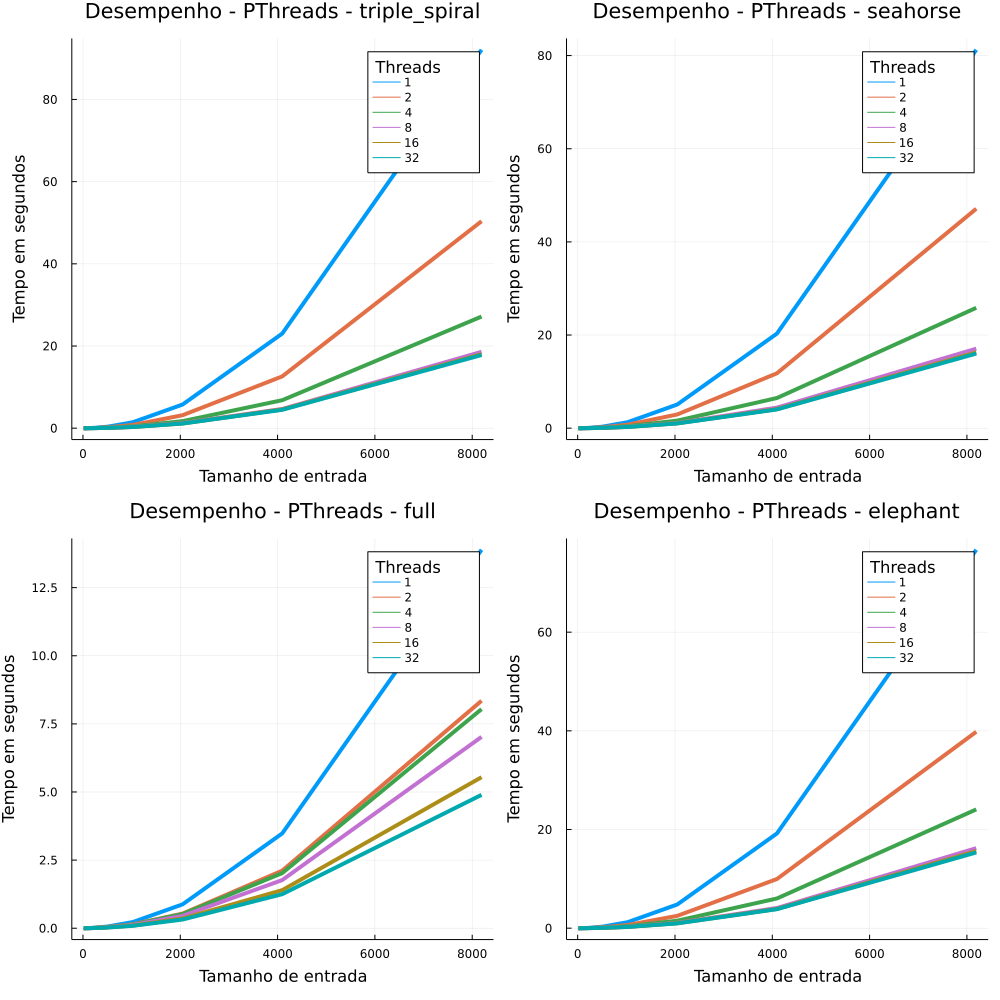

In [ ]:
ts = CSV.read("src/results/mandelbrot_pth/triple_spiral.csv", DataFrame)
sh = CSV.read("src/results/mandelbrot_pth/seahorse.csv", DataFrame)
full = CSV.read("src/results/mandelbrot_pth/full.csv", DataFrame)
elephant = CSV.read("src/results/mandelbrot_pth/elephant.csv", DataFrame)

pts = plot(ts.sizes, ts.avg_time, group=ts.threads,linewidth = 4,title="Desempenho - PThreads - triple_spiral",legendtitle="Threads")
psh = plot(sh.sizes, sh.avg_time, group=sh.threads,linewidth = 4,title="Desempenho - PThreads - seahorse",legendtitle="Threads")
pfull = plot(full.sizes, full.avg_time, group=full.threads,linewidth = 4,title="Desempenho - PThreads - full",legendtitle="Threads")
pel = plot(elephant.sizes, elephant.avg_time, group=elephant.threads,linewidth = 4,title="Desempenho - PThreads - elephant",legendtitle="Threads")
plot(pts,psh,pfull,pel,layout = @layout([pts psh; pfull pel]),size=(1000,1000))
xlabel!("Tamanho de entrada")
ylabel!("Tempo em segundos")


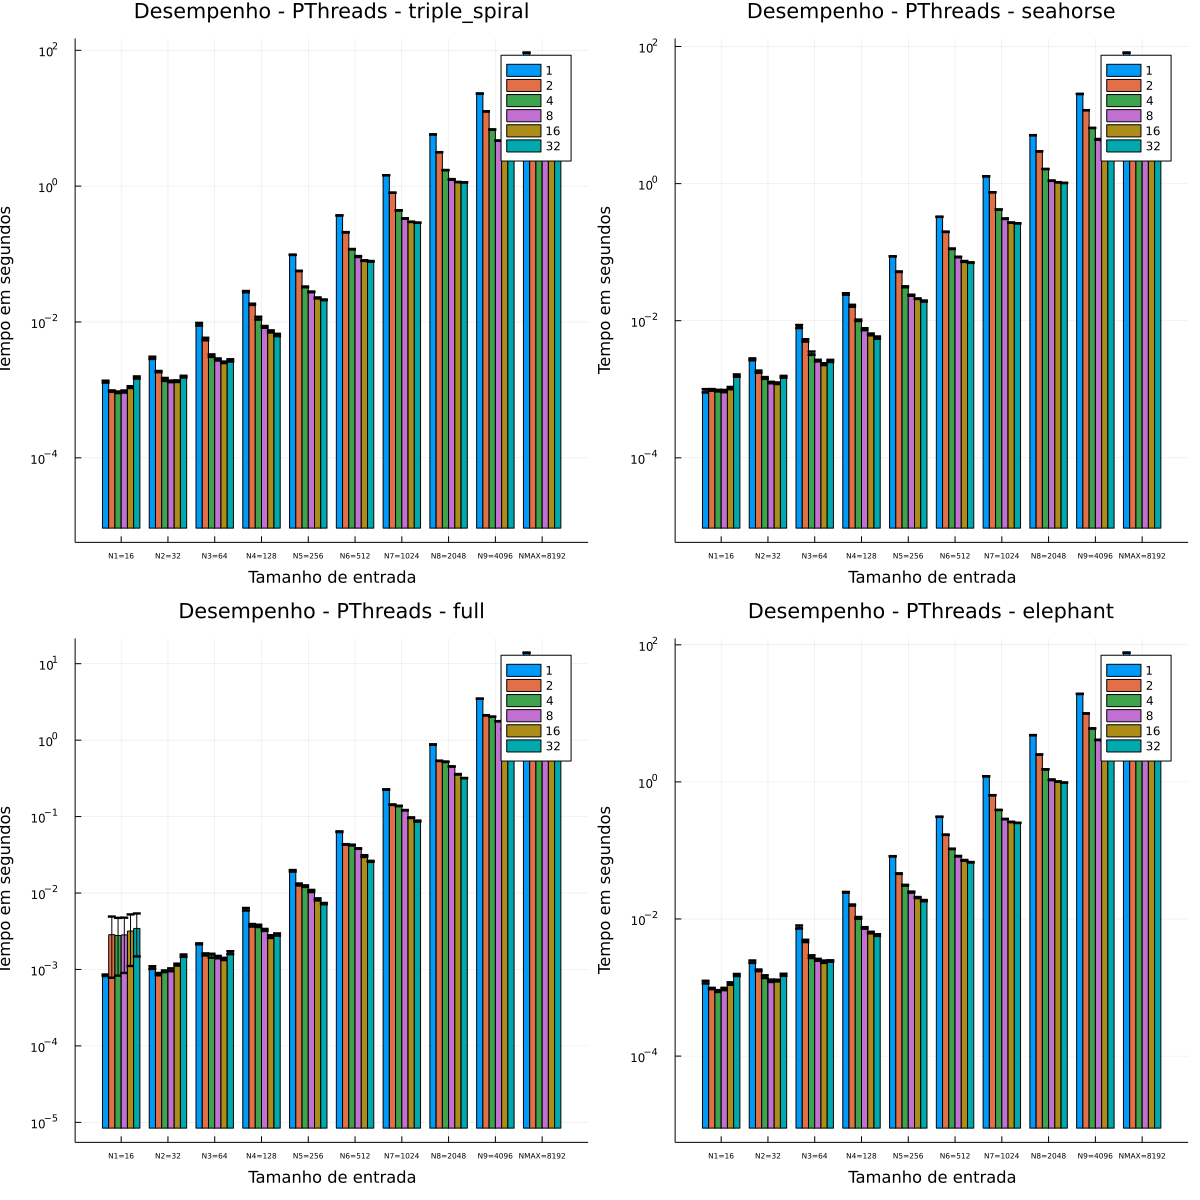

In [ ]:
##gambiarra para ordenar corretamente
tmp_ts = string.(ts.sizes)
for i = 1:length(tmp_ts)
    if tmp_ts[i] == "16"
        tmp_ts[i] = "N1=" * tmp_ts[i]
    elseif tmp_ts[i] == "32"
        tmp_ts[i] = "N2=" * tmp_ts[i]
    elseif tmp_ts[i] == "64"
        tmp_ts[i] = "N3=" * tmp_ts[i]
    elseif tmp_ts[i] == "128"
        tmp_ts[i] = "N4=" * tmp_ts[i]
    elseif tmp_ts[i] == "256"
        tmp_ts[i] = "N5=" * tmp_ts[i]
    elseif tmp_ts[i] == "512"
        tmp_ts[i] = "N6=" * tmp_ts[i]
    elseif tmp_ts[i] == "1024"
        tmp_ts[i] = "N7=" * tmp_ts[i]
    elseif tmp_ts[i] == "2048"
        tmp_ts[i] = "N8=" * tmp_ts[i]
    elseif tmp_ts[i] == "4096"
        tmp_ts[i] = "N9=" * tmp_ts[i]
    elseif tmp_ts[i] == "8192"
        tmp_ts[i] = "NMAX=" * tmp_ts[i]
    end
end

tmp_sh = string.(sh.sizes)
for i = 1:length(tmp_sh)
    if tmp_sh[i] == "16"
        tmp_sh[i] = "N1=" * tmp_sh[i]
    elseif tmp_sh[i] == "32"
        tmp_sh[i] = "N2=" * tmp_sh[i]
    elseif tmp_sh[i] == "64"
        tmp_sh[i] = "N3=" * tmp_sh[i]
    elseif tmp_sh[i] == "128"
        tmp_sh[i] = "N4=" * tmp_sh[i]
    elseif tmp_sh[i] == "256"
        tmp_sh[i] = "N5=" * tmp_sh[i]
    elseif tmp_sh[i] == "512"
        tmp_sh[i] = "N6=" * tmp_sh[i]
    elseif tmp_sh[i] == "1024"
        tmp_sh[i] = "N7=" * tmp_sh[i]
    elseif tmp_sh[i] == "2048"
        tmp_sh[i] = "N8=" * tmp_sh[i]
    elseif tmp_sh[i] == "4096"
        tmp_sh[i] = "N9=" * tmp_sh[i]
    elseif tmp_sh[i] == "8192"
        tmp_sh[i] = "NMAX=" * tmp_sh[i]
    end
end

tmp_el = string.(elephant.sizes)
for i = 1:length(tmp_el)
    if tmp_el[i] == "16"
        tmp_el[i] = "N1=" * tmp_el[i]
    elseif tmp_el[i] == "32"
        tmp_el[i] = "N2=" * tmp_el[i]
    elseif tmp_el[i] == "64"
        tmp_el[i] = "N3=" * tmp_el[i]
    elseif tmp_el[i] == "128"
        tmp_el[i] = "N4=" * tmp_el[i]
    elseif tmp_el[i] == "256"
        tmp_el[i] = "N5=" * tmp_el[i]
    elseif tmp_el[i] == "512"
        tmp_el[i] = "N6=" * tmp_el[i]
    elseif tmp_el[i] == "1024"
        tmp_el[i] = "N7=" * tmp_el[i]
    elseif tmp_el[i] == "2048"
        tmp_el[i] = "N8=" * tmp_el[i]
    elseif tmp_el[i] == "4096"
        tmp_el[i] = "N9=" * tmp_el[i]
    elseif tmp_el[i] == "8192"
        tmp_el[i] = "NMAX=" * tmp_el[i]
    end
end

tmp_full = string.(full.sizes)
for i = 1:length(tmp_full)
    if tmp_full[i] == "16"
        tmp_full[i] = "N1=" * tmp_full[i]
    elseif tmp_full[i] == "32"
        tmp_full[i] = "N2=" * tmp_full[i]
    elseif tmp_full[i] == "64"
        tmp_full[i] = "N3=" * tmp_full[i]
    elseif tmp_full[i] == "128"
        tmp_full[i] = "N4=" * tmp_full[i]
    elseif tmp_full[i] == "256"
        tmp_full[i] = "N5=" * tmp_full[i]
    elseif tmp_full[i] == "512"
        tmp_full[i] = "N6=" * tmp_full[i]
    elseif tmp_full[i] == "1024"
        tmp_full[i] = "N7=" * tmp_full[i]
    elseif tmp_full[i] == "2048"
        tmp_full[i] = "N8=" * tmp_full[i]
    elseif tmp_full[i] == "4096"
        tmp_full[i] = "N9=" * tmp_full[i]
    elseif tmp_full[i] == "8192"
        tmp_full[i] = "NMAX=" * tmp_full[i]
    end
end

## graficos de barra do paulo
using StatsPlots

gpsh = groupedbar(tmp_sh, sh.avg_time, yerr = sh.std_time,xtickfont=font(5), group = sh.threads, xlabel = "Tamanho de entrada", ylabel = "Tempo em segundos", title = "Desempenho - PThreads - seahorse",yaxis=:log)
gpts = groupedbar(tmp_ts, ts.avg_time, yerr = ts.std_time,xtickfont=font(5), group = ts.threads, xlabel = "Tamanho de entrada", ylabel = "Tempo em segundos", title = "Desempenho - PThreads - triple_spiral",yaxis=:log)
gpel = groupedbar(tmp_el, elephant.avg_time, yerr = elephant.std_time,xtickfont=font(5), group = elephant.threads, xlabel = "Tamanho de entrada", ylabel = "Tempo em segundos", title = "Desempenho - PThreads - elephant",yaxis=:log)
gpfu = groupedbar(tmp_full, full.avg_time, yerr = full.std_time,xtickfont=font(5), group = full.threads, xlabel = "Tamanho de entrada", ylabel = "Tempo em segundos", title = "Desempenho - PThreads - full",yaxis=:log)
plot(gpts,gpsh,gpfu,gpel,layout = @layout([gpts gpsh; gpfu gpel]),size=(1200,1200))


### OpenMP

Na figura abaixo são apresentados os resultados obtidos para o código do `mandelbrot_omp.c` utilizando a biblioteca OpenMP para as quatro regiões de Mandelbrot com a variação do número de threads e entradas.

Abaixo são analisados os gráficos e comentado o impacto no tempo de execução conforme:

- mudança do tamanho da entrada:
  - O tempo de execução é proporcional ao tamanho da entrada que varia de 2^4 a 2^{13};
  - O tempo de execução é menor nas versões paralelizadas acima de 32 entradas quando comparado a variação de threads;
  - Para entrada de 16 as regiões com uma thread o tempo de execução é menor;

- mudança das regiões do Conjunto de Mandelbrot:
  - Na região full o modelo sequencia é muito mais rápido para 16 e 32 comparado com a versão com mais de 2 threads e com mais threads o tempo de execução é muito alto comparado com o sequencial;
  - Nas regiões elephant, seahorse, triple spiral o tempo de execução para entrada de 16 é relativamente mais rápido com múltiplas threads quando comparado com a versão full;

- incremento do número de threads:
  - Como já dito, o tempo de execução para o número de threads para pequenas (1,2) entradas é mais rápido do que para mais threads, entretanto conforme aumenta o número de entradas o tempo fica menor conforme aumentou o número de threads, como já esperado, mas não necessariamente conforme aumenta mais threads o programa fica mais rápido, tenho um mínimo ótimo de 8 a 16 threads para as diferentes regiões.


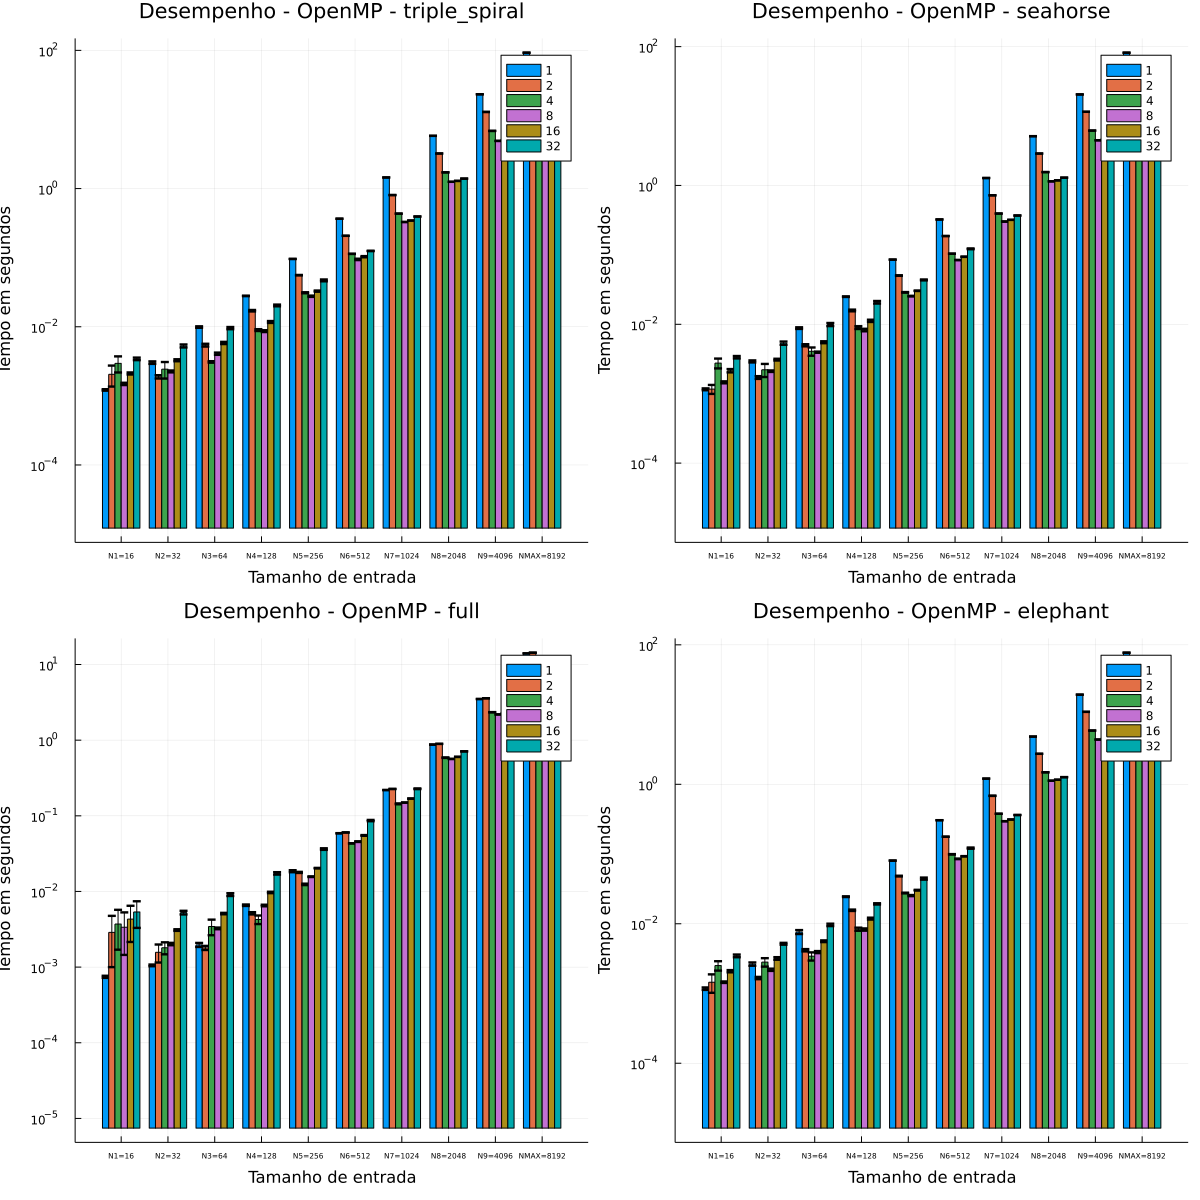

In [ ]:
ts = CSV.read("src/results/mandelbrot_omp/triple_spiral.csv", DataFrame)
sh = CSV.read("src/results/mandelbrot_omp/seahorse.csv", DataFrame)
full = CSV.read("src/results/mandelbrot_omp/full.csv", DataFrame)
elephant = CSV.read("src/results/mandelbrot_omp/elephant.csv", DataFrame)

##gambiarra para ordenar corretamente
tmp_ts = string.(ts.sizes)
for i = 1:length(tmp_ts)
    if tmp_ts[i] == "16"
        tmp_ts[i] = "N1=" * tmp_ts[i]
    elseif tmp_ts[i] == "32"
        tmp_ts[i] = "N2=" * tmp_ts[i]
    elseif tmp_ts[i] == "64"
        tmp_ts[i] = "N3=" * tmp_ts[i]
    elseif tmp_ts[i] == "128"
        tmp_ts[i] = "N4=" * tmp_ts[i]
    elseif tmp_ts[i] == "256"
        tmp_ts[i] = "N5=" * tmp_ts[i]
    elseif tmp_ts[i] == "512"
        tmp_ts[i] = "N6=" * tmp_ts[i]
    elseif tmp_ts[i] == "1024"
        tmp_ts[i] = "N7=" * tmp_ts[i]
    elseif tmp_ts[i] == "2048"
        tmp_ts[i] = "N8=" * tmp_ts[i]
    elseif tmp_ts[i] == "4096"
        tmp_ts[i] = "N9=" * tmp_ts[i]
    elseif tmp_ts[i] == "8192"
        tmp_ts[i] = "NMAX=" * tmp_ts[i]
    end
end

tmp_sh = string.(sh.sizes)
for i = 1:length(tmp_sh)
    if tmp_sh[i] == "16"
        tmp_sh[i] = "N1=" * tmp_sh[i]
    elseif tmp_sh[i] == "32"
        tmp_sh[i] = "N2=" * tmp_sh[i]
    elseif tmp_sh[i] == "64"
        tmp_sh[i] = "N3=" * tmp_sh[i]
    elseif tmp_sh[i] == "128"
        tmp_sh[i] = "N4=" * tmp_sh[i]
    elseif tmp_sh[i] == "256"
        tmp_sh[i] = "N5=" * tmp_sh[i]
    elseif tmp_sh[i] == "512"
        tmp_sh[i] = "N6=" * tmp_sh[i]
    elseif tmp_sh[i] == "1024"
        tmp_sh[i] = "N7=" * tmp_sh[i]
    elseif tmp_sh[i] == "2048"
        tmp_sh[i] = "N8=" * tmp_sh[i]
    elseif tmp_sh[i] == "4096"
        tmp_sh[i] = "N9=" * tmp_sh[i]
    elseif tmp_sh[i] == "8192"
        tmp_sh[i] = "NMAX=" * tmp_sh[i]
    end
end

tmp_el = string.(elephant.sizes)
for i = 1:length(tmp_el)
    if tmp_el[i] == "16"
        tmp_el[i] = "N1=" * tmp_el[i]
    elseif tmp_el[i] == "32"
        tmp_el[i] = "N2=" * tmp_el[i]
    elseif tmp_el[i] == "64"
        tmp_el[i] = "N3=" * tmp_el[i]
    elseif tmp_el[i] == "128"
        tmp_el[i] = "N4=" * tmp_el[i]
    elseif tmp_el[i] == "256"
        tmp_el[i] = "N5=" * tmp_el[i]
    elseif tmp_el[i] == "512"
        tmp_el[i] = "N6=" * tmp_el[i]
    elseif tmp_el[i] == "1024"
        tmp_el[i] = "N7=" * tmp_el[i]
    elseif tmp_el[i] == "2048"
        tmp_el[i] = "N8=" * tmp_el[i]
    elseif tmp_el[i] == "4096"
        tmp_el[i] = "N9=" * tmp_el[i]
    elseif tmp_el[i] == "8192"
        tmp_el[i] = "NMAX=" * tmp_el[i]
    end
end

tmp_full = string.(full.sizes)
for i = 1:length(tmp_full)
    if tmp_full[i] == "16"
        tmp_full[i] = "N1=" * tmp_full[i]
    elseif tmp_full[i] == "32"
        tmp_full[i] = "N2=" * tmp_full[i]
    elseif tmp_full[i] == "64"
        tmp_full[i] = "N3=" * tmp_full[i]
    elseif tmp_full[i] == "128"
        tmp_full[i] = "N4=" * tmp_full[i]
    elseif tmp_full[i] == "256"
        tmp_full[i] = "N5=" * tmp_full[i]
    elseif tmp_full[i] == "512"
        tmp_full[i] = "N6=" * tmp_full[i]
    elseif tmp_full[i] == "1024"
        tmp_full[i] = "N7=" * tmp_full[i]
    elseif tmp_full[i] == "2048"
        tmp_full[i] = "N8=" * tmp_full[i]
    elseif tmp_full[i] == "4096"
        tmp_full[i] = "N9=" * tmp_full[i]
    elseif tmp_full[i] == "8192"
        tmp_full[i] = "NMAX=" * tmp_full[i]
    end
end

## graficos de barra do paulo
using StatsPlots

gpsh = groupedbar(tmp_sh, sh.avg_time, yerr = sh.std_time,xtickfont=font(5), group = sh.threads, xlabel = "Tamanho de entrada", ylabel = "Tempo em segundos", title = "Desempenho - OpenMP - seahorse",yaxis=:log)
gpts = groupedbar(tmp_ts, ts.avg_time, yerr = ts.std_time,xtickfont=font(5), group = ts.threads, xlabel = "Tamanho de entrada", ylabel = "Tempo em segundos", title = "Desempenho - OpenMP - triple_spiral",yaxis=:log)
gpel = groupedbar(tmp_el, elephant.avg_time, yerr = elephant.std_time,xtickfont=font(5), group = elephant.threads, xlabel = "Tamanho de entrada", ylabel = "Tempo em segundos", title = "Desempenho - OpenMP - elephant",yaxis=:log)
gpfu = groupedbar(tmp_full, full.avg_time, yerr = full.std_time,xtickfont=font(5), group = full.threads, xlabel = "Tamanho de entrada", ylabel = "Tempo em segundos", title = "Desempenho - OpenMP - full",yaxis=:log)
plot(gpts,gpsh,gpfu,gpel,layout = @layout([gpts gpsh; gpfu gpel]),size=(1200,1200))

## Conclusão

Ambas as implementações de paralelização, com Pthreads e com OpenMP, se mostraram efetivas à redução de tempo de execução em relação à versão sequencial do algoritmo, dado um tamanho mínimo de entrada. É possível notar também que existe uma quantidade de threads ótima (4 a 8) dado o processador que foi utilizado, a partir do qual o tempo de execução para de apresentar uma diminuição significativa ou até mesmo insinua uma tendência de aumento. Para as quatro regiões, pode-se apontar que para o mesmo tamanho e entrada, “full” é a mais rápido de ser gerado, enquanto o “triple spiral valley” é a mais lenta. Provavelmente isso se deve ao número de operações que precisam ser realizadas antes de romper os loops iterativos. Inclusive, isso pode também causar uma irregularidade na otimização por paralelização, pois as threads podem receber cargas de trabalho desiguais.

Por fim, é notável a característica de “mais alto nível” do OpenMP mencionado na seção de metodologia, uma vez que o seu código se apresentou mais enxuto do que o com implementação em Pthreads: 180 linhas contra 230 linhas, respectivamente. 
